In [2]:
########################################################################################################################################################################

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#Test to edit

#this is all to normalize the font sizes for every graph
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [22]:
########################################################################################################################################################################

#this function takes the boundaries fo two bins given from the np.histogram function and returns the midpoint of the
#bin which can be used to plot the function with plt.plot as a line graph
def newBins(b):
    bins = []
    for i in range(1, len(b)):
        mid = (b[i-1] + b[i])/2
        bins.append(mid)
    return bins
#---------------------------------------------------------------------------------------------

########################################################################################################################################################################

#this function takes data from counts and bins to a list of repeated values to be used with plt.hist
def newList(counts, b):
    tot_counts = 0
    hist_list = [] #new list with all the numbers repeated
    bins = newBins(b) #values of midpoints of bins
    
    #checking so code doesnt run an error 
    if len(counts) != len(bins): 
        print("The lists do not match lengths") 
        return 
    
    
    #populating the new hist_list
    for i in range(len(counts)):
        times = counts[i] #how many times a certain value will be added to the list 
        value = bins[i] #what value is going to be added to the list 
        tot_counts += times #keeping track to check at the end if we have all the counts recorded
        
        if times != 0: #if it has a non zero occurance
            for i in range(times): #loop to add as many times as necessary to the new list 
                hist_list.append(value)
       
    #checking to make sure we have all the counts recorded before returning the list
    if len(hist_list) == tot_counts: 
        
        return hist_list
#---------------------------------------------------------------------------------------------

########################################################################################################################################################################

#this is a function for the EGun Data. Data comes from teh oscilliscope in Vs and this function converts to C by 
#deviding by 50 Ohms 
def VStoC(data):
    c_data = [] #list of coloumb values
    for i in data:
        c_data.append(i/50) #VS/ohm
    return c_data
#---------------------------------------------------------------------------------------------

########################################################################################################################################################################

#plotting a histogram quickly from the .csv file
def plotHistFromCsv(filename, bin_num = 50):
    df = pd.read_csv(filename) #creates a dataframe of the csv
    d = np.array(df["Area"]) #gets the coloumn of interest
    data = VStoC(d) #convert data from Vs --> C
    plt.figure(figsize = (10,5)) #the size of the figure
    plt.hist(data, bins = bin_num) #plotting the hsitogram from the list of values
    plt.title(filename) #the titles is the name of the file
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()
    
#---------------------------------------------------------------------------------------------    


#plotting a histogram from the data given it, not straight from Csv    
def plotHist(data, name, bin_num = 50): #name is for the title of the graph
    plt.figure(figsize = (10,5))
    plt.hist(data, bins = bin_num) 
    plt.title(name)
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()

#---------------------------------------------------------------------------------------------

#getting just the data from a csv file
def histData(filename, lowlim = -10, uplim = 10):
    df = pd.read_csv(filename) #creates a dataframe of the csv
    d = np.array(df["Area"]) #coloumn of interest
    data = VStoC(d) #this array can be used to fit a normal distribution
    trunc_data = [] #data with the lower limt applied, if nothing specified, all values will be taken 
    for i in data:
        if i >= lowlim and i <= uplim: #finding data within the range, in order to fit a distribution 
            #to it if necessary
            trunc_data.append(i)
    return trunc_data

#---------------------------------------------------------------------------------------------

#Standard find the index of the value given in a list
def idxFind(lst, value):
    idx = -1
    for i in range(len(lst)):
        if value == lst[i]:
            idx = i
            return idx
        
#---------------------------------------------------------------------------------------------


#finding the energy resolution from the data given with the graph x limits
def normData(data, lowlim, uplim , filename,bin_num = 50):
    mean,std=norm.fit(data) #fitting the norm distribution to the data given
    x = np.linspace(lowlim, uplim, 1000) #list of nubers for x vlaues
    y = norm.pdf(x, mean, std) #applying the normal distribution to the xvalues 
    plt.figure(figsize = (10,8))
    plt.hist(data, bins = bin_num, normed = True, alpha = 0.4,color = "cornflowerblue") #plotting noramlized data
    plt.plot(x,y, c = "blue") # plot normal distribtion 
    
    
    #looking for the peak 
    peak = 0
    peak_x = 0
    ind = 0
    for i in range(len(x)):
        if y[i] >= peak:
            peak = y[i]
        else:
            peak = y[i-1] #this is the peak value, because function decreases after that in a norm function
            peak_x = x[i]
            ind =i-1 #the index of the peak value
            break #end the loop
#     plt.scatter(x[ind], y[ind], c ="R") #plot the peak value on the graph
    halfmax = peak/2
    x_hlf = np.linspace(lowlim, uplim, 1000) #another list of values
    y_hlf = [halfmax]*1000 #a list of 1000 values of the halfmax in order to plot a straight line throug the graph
#     plt.plot(x_hlf, y_hlf) #plotting the line that goes through the half max of the graph
    
    
    #now need to find the closest x value to the intercepts of the fitted normal fucntion data and the full width 
    #half max line
    firsthlf_dist = [] # list of the distances from the FWHM and that value for the first half of the norm fucntion
    sechlf_dist = [] # list of the distances from the FWHM and that value for the second half of the norm fucntion
    for i in range(len(y)):
        if i <= ind:
            firsthlf_dist.append(abs(y[i]-halfmax)) #appending all of the distances in order to find the minimum
            
        
        if i > ind:
            sechlf_dist.append(abs(y[i]-halfmax)) #appending all of the distances in order to find the minimum
            
    left_idx = idxFind(firsthlf_dist, min(firsthlf_dist)) #finding the idx of the minimum
    right_idx = idxFind(sechlf_dist, min(sechlf_dist))
            
#     plt.scatter(x[left_idx], y[left_idx], c ="g") #plotting the left intersect
    
#     plt.scatter(x[right_idx+ind], y[right_idx+ ind], c ="g") #plotting the right intersect 

    plt.title(filename)
    annot = "Peak X-value: " + "{:.2e}".format(x[ind]) #annotation for the peak xvalue to show up on the graph
    plt.annotate(annot, xy=(0.05, 0.9), xycoords='axes fraction')
    plt.xlabel("Charge [C]")
    plt.ylabel("Normalized Counts") #has to be noramlized in order to fit the function to it

    plt.show()
    
    fullwidth = abs( x[right_idx+ind]- x[left_idx]) #finding the width of the left point and the right point 
    
    

    
    
    resolution = fullwidth / peak_x #resolution = FWHM/peakXValue
    print(filename, "peak:",peak_x, "fwhm:", fullwidth, "resolution:", resolution)
    
    return abs(resolution), fullwidth, peak_x




    
    
 

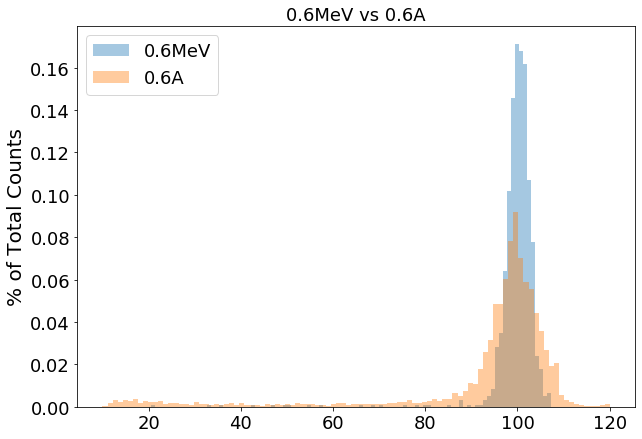

In [42]:
########################################################################################################################################################################
df = pd.read_csv("simtomeas3.csv")
bin_num =100

# data_MeV = normY(df["0.6MeV"])
# data_Amp = normY(df["0.6Amp"])




plt.figure(figsize = (10,7))
plt.hist(df["0.6MeV"], bins = bin_num, alpha = 0.4, label = "0.6MeV", density=True) 
plt.hist(df["0.6Amp"], bins = bin_num, alpha = 0.4, label = "0.6A", density=True) #density shows the percent of the
#counts (? https://matplotlib.org/stable/gallery/statistics/hist.html)

plt.title("0.6MeV vs 0.6A")
# plt.xlabel("Charge [C]")
plt.ylabel("% of Total Counts")
plt.legend()
plt.show()


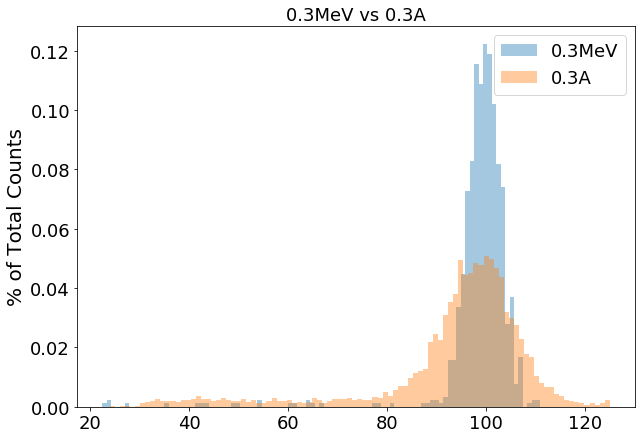

In [52]:
########################################################################################################################################################################
df = pd.read_csv("simtomeas3.csv")
bin_num =99


# data_MeV = normY(df["0.3MeV"])
# data_Amp = normY(df["0.3Amp"])




plt.figure(figsize = (10,7))
plt.hist(df["0.3MeV"], bins = bin_num, alpha = 0.4, label = "0.3MeV", density=True) #alpha- transperency, range - range of the graph 
plt.hist(df["0.3Amp"], bins = bin_num, alpha = 0.4, label = "0.3A", density=True) 
plt.title("0.3MeV vs 0.3A")
plt.ylabel("% of Total Counts")
plt.legend()
plt.show()


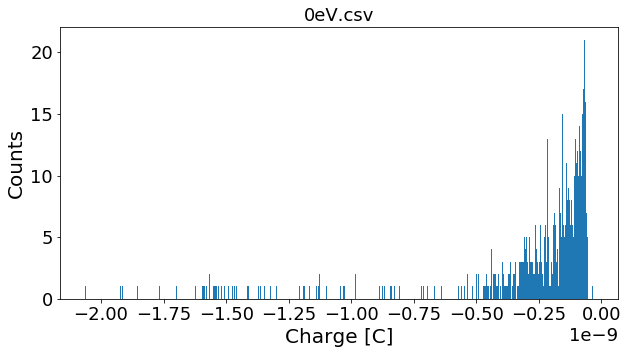

In [83]:
########################################################################################################################################################################
filename = '0eV.csv'
plotHistFromCsv(filename, 1000)

0.3ev


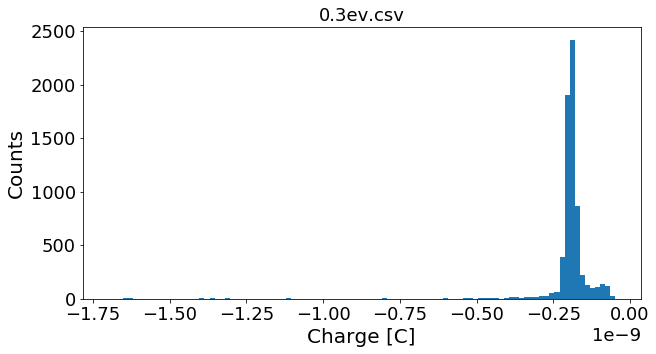

166 / 1000


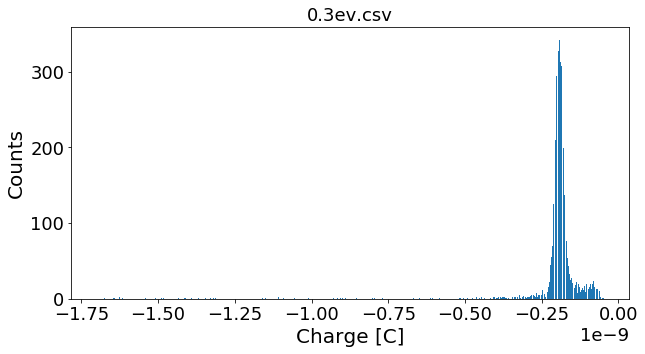

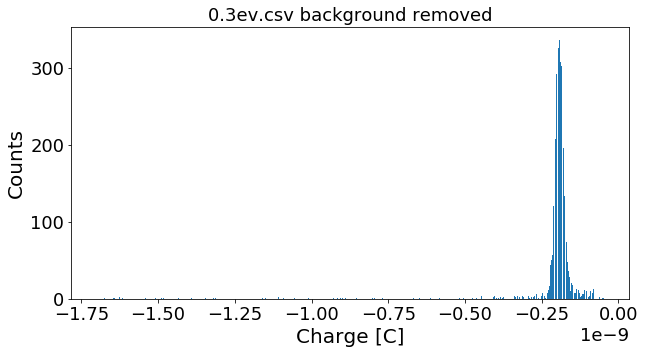

1000 1000
     count           bin
0        0 -2.061386e-09
1        0 -2.059358e-09
2        0 -2.057330e-09
3        0 -2.055303e-09
4        0 -2.053275e-09
5        0 -2.051247e-09
6        0 -2.049219e-09
7        0 -2.047191e-09
8        0 -2.045163e-09
9        0 -2.043136e-09
10       0 -2.041108e-09
11       0 -2.039080e-09
12       0 -2.037052e-09
13       0 -2.035024e-09
14       0 -2.032996e-09
15       0 -2.030968e-09
16       0 -2.028941e-09
17       0 -2.026913e-09
18       0 -2.024885e-09
19       0 -2.022857e-09
20       0 -2.020829e-09
21       0 -2.018801e-09
22       0 -2.016774e-09
23       0 -2.014746e-09
24       0 -2.012718e-09
25       0 -2.010690e-09
26       0 -2.008662e-09
27       0 -2.006634e-09
28       0 -2.004607e-09
29       0 -2.002579e-09
..     ...           ...
970      4 -9.438012e-11
971     10 -9.235227e-11
972      0 -9.032443e-11
973      0 -8.829659e-11
974      1 -8.626875e-11
975      7 -8.424091e-11
976     13 -8.221307e-11
977      9 -8.0

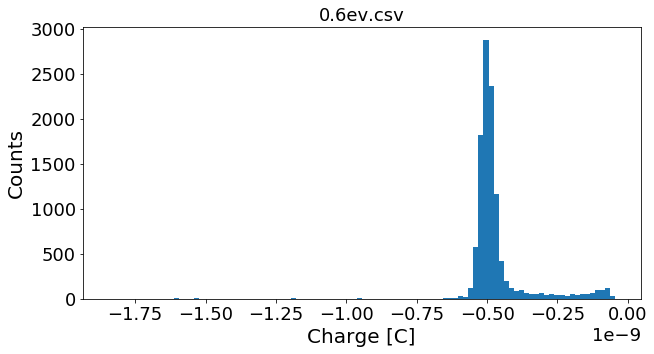

126 / 1000


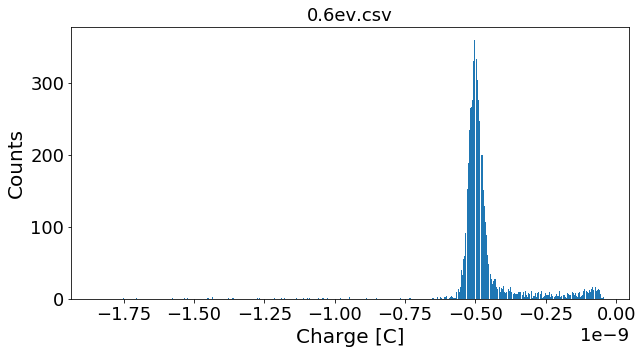

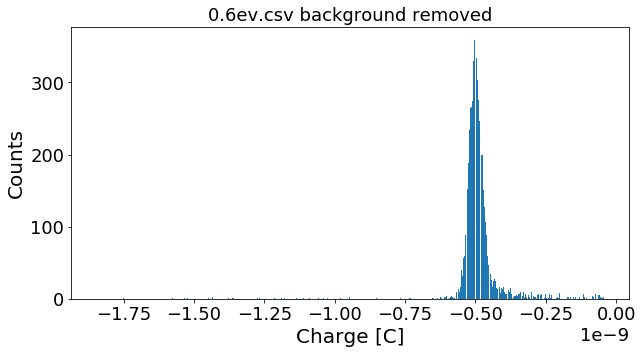

1000 1000
     count           bin
0        0 -2.061386e-09
1        0 -2.059358e-09
2        0 -2.057330e-09
3        0 -2.055303e-09
4        0 -2.053275e-09
5        0 -2.051247e-09
6        0 -2.049219e-09
7        0 -2.047191e-09
8        0 -2.045163e-09
9        0 -2.043136e-09
10       0 -2.041108e-09
11       0 -2.039080e-09
12       0 -2.037052e-09
13       0 -2.035024e-09
14       0 -2.032996e-09
15       0 -2.030968e-09
16       0 -2.028941e-09
17       0 -2.026913e-09
18       0 -2.024885e-09
19       0 -2.022857e-09
20       0 -2.020829e-09
21       0 -2.018801e-09
22       0 -2.016774e-09
23       0 -2.014746e-09
24       0 -2.012718e-09
25       0 -2.010690e-09
26       0 -2.008662e-09
27       0 -2.006634e-09
28       0 -2.004607e-09
29       0 -2.002579e-09
..     ...           ...
970      0 -9.438012e-11
971      0 -9.235227e-11
972      0 -9.032443e-11
973      0 -8.829659e-11
974      0 -8.626875e-11
975      4 -8.424091e-11
976      0 -8.221307e-11
977      2 -8.0

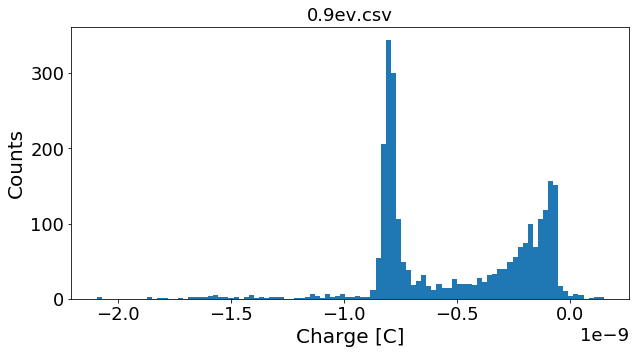

120 / 1000


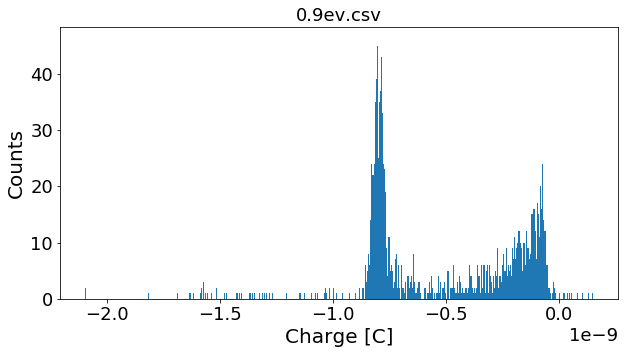

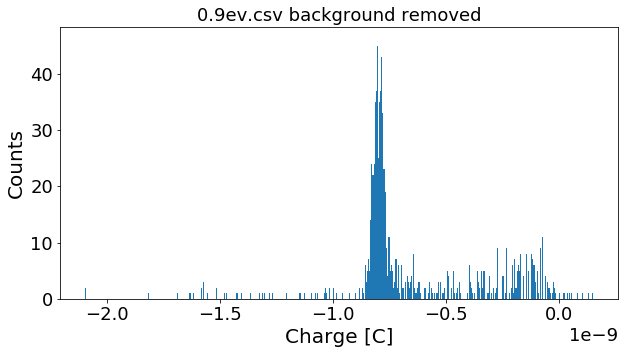

1000 1000
     count           bin
0        2 -2.094418e-09
1        0 -2.092175e-09
2        0 -2.089932e-09
3        0 -2.087689e-09
4        0 -2.085446e-09
5        0 -2.083203e-09
6        0 -2.080960e-09
7        0 -2.078717e-09
8        0 -2.076474e-09
9        0 -2.074231e-09
10       0 -2.071988e-09
11       0 -2.069744e-09
12       0 -2.067501e-09
13       0 -2.065258e-09
14       0 -2.063015e-09
15       0 -2.060772e-09
16       0 -2.058529e-09
17       0 -2.056286e-09
18       0 -2.054043e-09
19       0 -2.051800e-09
20       0 -2.049557e-09
21       0 -2.047314e-09
22       0 -2.045070e-09
23       0 -2.042827e-09
24       0 -2.040584e-09
25       0 -2.038341e-09
26       0 -2.036098e-09
27       0 -2.033855e-09
28       0 -2.031612e-09
29       0 -2.029369e-09
..     ...           ...
970      1  8.137807e-11
971      0  8.362116e-11
972      0  8.586425e-11
973      0  8.810734e-11
974      0  9.035043e-11
975      0  9.259351e-11
976      0  9.483660e-11
977      0  9.7

In [90]:
########################################################################################################################################################################

files = ['0.3ev.csv', '0.6ev.csv', '0.9ev.csv']

df_0 = pd.read_csv('0eV.csv') #creates a dataframe of the csv
d_0 = np.array(df_0["Area"])
data_0 = VStoC(d_0)


# bkgsub_data = {'count':n,
#         'bin': bins
#         }

# bkgsub_df = pd.DataFrame(bkgsub_data, columns= ['count', 'bin'])

# df.to_csv (r'/Users/faith/Documents/2021 Spring/LEGEND/EGun/bkg_sub.csv', index = False, header=True)

for filename in files:
    print(filename[:-4])
    df = pd.read_csv(filename) #creates a dataframe of the csv
    plotHistFromCsv(filename, 100)
#     plotHistFromCsv('0ev.csv', 100)
    d = np.array(df["Area"])
    data = VStoC(d)
    
    nbins = 1000
    #minimum value element wise from both arrays
    mn = min(data)
    mn_0 = min(data_0)
    if mn <= mn_0:
        minimum = mn
    else:
        minimum = mn_0
    #maximum value element wise from both arrays
    mx = max(data)
    mx_0 = max(data_0)
    if mx >= mx_0:
        maximum = mx
    else:
        maximum = mx_0
    #histogram is build with fixed min and max values
    hist, b = np.histogram(data,range=(minimum,maximum), bins=nbins)
    hist_0, b_0 = np.histogram(data_0,range=(minimum,maximum), bins=nbins)
    dif = hist - hist_0
    diff = []
    negs = 0
    for d in dif:
        if d >=0:
            diff.append(d)
        else:
            negs +=1
            diff.append(0)
    print(negs, '/', len(dif))
#     print('-----------')
#     print(hist_0)
#     print('=========')
#     print(diff)
#     print('******')
#     for t in range(len(hist)):
#         print(hist[t], '-', hist_0[t], '=', diff[t])

    
    diff_data = newList(diff, b)
    binned_data = newList(hist, b)
#     print(diff_data)
    plotHist(binned_data, filename, nbins)
    plotHist(diff_data, filename + " background removed", nbins)
    new_bin = newBins(b)
    print(len(new_bin), len(diff))
    
#     bkgsub_data = {'count':diff,
#         'bin': new_bin
#         }
    
#     bkgsub_df = pd.DataFrame(bkgsub_data, columns= ['count', 'bin'])
#     print(bkgsub_df)

#     bkgsub_df.to_csv(r'/Users/faith/Documents/2021 Spring/LEGEND/EGun/bkg_sub'+ filename[:-4] + '.csv', index = False, header=True)
    
    
    
#     mn = min(data)
#     mx = max(data)
#     counts, bins = np.histogram(data, bins = 100)
#     counts_l, bins_l = np.histogram(data, bins = np.linspace(mn, mx, 100))
#     print(counts, counts_l)
#     print(bins, bins_l)
#     print(len(counts), len(bins))
#     print(len(counts_l), len(bins_l))
    
    
    

filename = '0eV.csv'
df = pd.read_csv(filename) #creates a dataframe of the csv
d = np.array(df["Area"])
data = VStoC(d)
counts, bins = np.histogram(data, bins = 100)
print(counts, bins)

